# Prepping Data Week 2

For week 2 of our beginner month, Data Source Bank has a requirement to construct International Bank Account Numbers (IBANs), even for Transactions taking place in the UK. We have all the information in separate fields, we just need to put it altogether in the following order:

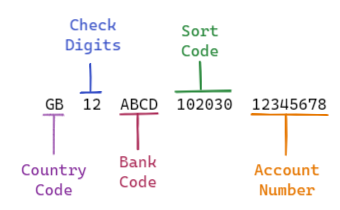



Inputs
- A list of the transactions, with information about the receiving bank account 
- A lookup table for the SWIFT Bank Codes 

Requirements
1. Input the data
2. In the Transactions table, there is a Sort Code field which contains dashes. We need to remove these so just have a 6 digit string (hint)
3. Use the SWIFT Bank Code lookup table to bring in additional information about the SWIFT code and Check Digits of the receiving bank account (hint)
4. Add a field for the Country Code (hint)
Hint: all these transactions take place in the UK so the Country Code should be GB
5. Create the IBAN as above (hint)
Hint: watch out for trying to combine sting fields with numeric fields - check data types
Remove unnecessary fields (hint)
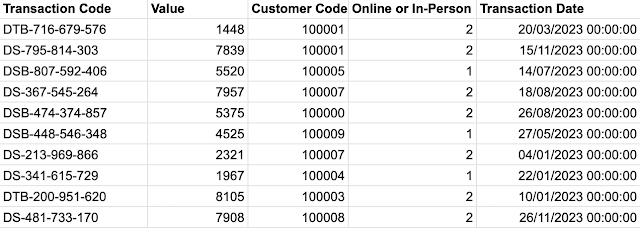

In [26]:
import os
import numpy as np
import pandas as pd

In [2]:
os.listdir()

['Swift Codes.csv', 'Transactions.csv', 'Week2.ipynb']

In [27]:
# Read in csv file
df = pd.read_csv("Transactions.csv")
df.head()

,Transaction ID,Account Number,Sort Code,Bank
0,3888,62230725,95-98-82,Data Source Bank
1,4746,83172326,42-86-38,Barclays Bank
2,5404,34302539,53-28-21,Barclays Bank
3,9013,13350031,93-87-71,Natwest
4,2535,68745993,57-14-32,Barclays Bank


In [28]:
# Remove dashes in Sort Code field to get 6 digit string

df['Sort Code'] = df['Sort Code'].str.replace('-','')

In [29]:
df.head()

,Transaction ID,Account Number,Sort Code,Bank
0,3888,62230725,959882,Data Source Bank
1,4746,83172326,428638,Barclays Bank
2,5404,34302539,532821,Barclays Bank
3,9013,13350031,938771,Natwest
4,2535,68745993,571432,Barclays Bank


In [30]:
# 3. Use the SWIFT Bank Code lookup table to bring in 
# additional information about the SWIFT code and 
# Check Digits of the receiving bank account (hint)

swift = pd.read_csv("Swift Codes.csv")

swift.head()

,Bank,SWIFT code,Check Digits
0,Lloyds Bank,LOYD,C1
1,Barclays Bank,BARC,22
2,Halifax,HLFX,22
3,HSBC,HBUK,4B
4,Natwest,NWBK,2L


In [31]:
df1 = df.merge(swift, how='left', on ='Bank' )

In [32]:
df1.head()

,Transaction ID,Account Number,Sort Code,Bank,SWIFT code,Check Digits
0,3888,62230725,959882,Data Source Bank,DSBX,12
1,4746,83172326,428638,Barclays Bank,BARC,22
2,5404,34302539,532821,Barclays Bank,BARC,22
3,9013,13350031,938771,Natwest,NWBK,2L
4,2535,68745993,571432,Barclays Bank,BARC,22


In [33]:
# 4. Add a field for the Country Code (hint)

df1['Country Code'] ="GB"

df1.head()

,Transaction ID,Account Number,Sort Code,Bank,SWIFT code,Check Digits,Country Code
0,3888,62230725,959882,Data Source Bank,DSBX,12,GB
1,4746,83172326,428638,Barclays Bank,BARC,22,GB
2,5404,34302539,532821,Barclays Bank,BARC,22,GB
3,9013,13350031,938771,Natwest,NWBK,2L,GB
4,2535,68745993,571432,Barclays Bank,BARC,22,GB


5. Create the IBAN as above (hint)
Hint: watch out for trying to combine sting fields with numeric fields - check data types
Remove unnecessary fields (hint)

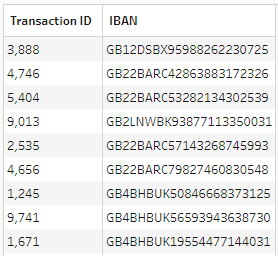

2 fields
Transaction ID
IBAN
100 rows (101 including headers)

In [34]:
df1['IBAN'] = df1['Country Code'] + df1['Check Digits']  + df1['SWIFT code'] + df['Sort Code']+ df1['Account Number'].astype('str')

In [35]:
df2 = df1[['Transaction ID','IBAN']]

df2.head()

,Transaction ID,IBAN
0,3888,GB12DSBX95988262230725
1,4746,GB22BARC42863883172326
2,5404,GB22BARC53282134302539
3,9013,GB2LNWBK93877113350031
4,2535,GB22BARC57143268745993


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  100 non-null    int64 
 1   IBAN            100 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
